<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ANOVA-:-ANalysis-Of-VAriance" data-toc-modified-id="ANOVA-:-ANalysis-Of-VAriance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ANOVA : ANalysis Of VAriance</a></span></li><li><span><a href="#One--way-ANOVA-(one-factor)" data-toc-modified-id="One--way-ANOVA-(one-factor)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>One- way ANOVA (one factor)</a></span></li><li><span><a href="#Tukey's-Honestly-Significantly-differenced-Test" data-toc-modified-id="Tukey's-Honestly-Significantly-differenced-Test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tukey's Honestly Significantly differenced Test</a></span></li><li><span><a href="#How-to-Test-the-Assumptions-of-ANOVA" data-toc-modified-id="How-to-Test-the-Assumptions-of-ANOVA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>How to Test the Assumptions of ANOVA</a></span><ul class="toc-item"><li><span><a href="#QQ-plot-and-Histogram" data-toc-modified-id="QQ-plot-and-Histogram-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>QQ plot and Histogram</a></span></li><li><span><a href="#Shapiro-Wilk-Test" data-toc-modified-id="Shapiro-Wilk-Test-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Shapiro-Wilk Test</a></span></li><li><span><a href="#Bartlett’s-test" data-toc-modified-id="Bartlett’s-test-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Bartlett’s test</a></span></li><li><span><a href="#Levene’s-test" data-toc-modified-id="Levene’s-test-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Levene’s test</a></span></li></ul></li></ul></div>

## ANOVA : ANalysis Of VAriance

* ANOVA is the statistical test used to compare the means of more than 2 groups
* Groups mean differences inferred by analyzing varainces, hence the name Analysis of Varaince
* ANOVA uses variance based F test to check the group mean equality. The ANOVA F test is also called as omnibus test as it tests non-specific null hypothesis ,i.e. all group means are equal


ANOVA Hypotheses: 
* Null hypotheses: Groups means are equal (no variation in means of groups)
H0: μ1=μ2=…=μp
* Alternative hypotheses: At least, one group mean is different from other groups
H1: All μ are not equal

ANOVA Assumptions:
* Residuals (experimental error) are normally distributed (Shapiro-Wilks Test)
* Homogeneity of variances (variances are equal between treatment groups) (Levene’s or Bartlett’s Test)
* Observations are sampled independently from each other

Steps:
* Check sample sizes: equal number of observation in each group
* Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degree of freedom (df) for a group
* Calculate Mean Square error (MSE) (SS error/df of residuals)
* Calculate F value (MS of group/MSE)

## One- way ANOVA (one factor)

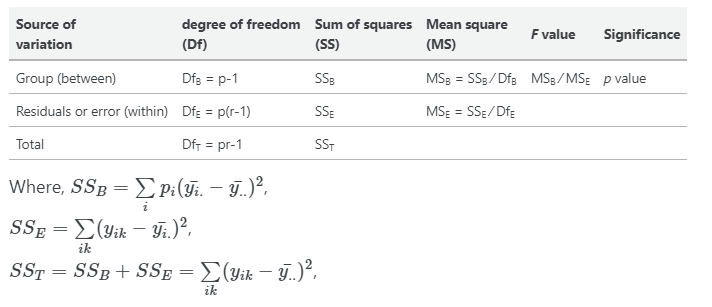

In [1]:
from IPython.display import Image
Image(filename=r'C:\Users\Goutham-ROG\Documents\DS studies\College\2nd Sem - 20.0\MSE - Multivariate Analysis and Econometrics - 3.0\Assignment\deepdive snips\Oneway anova.png')

In [2]:
#Let's Import our dataset
import pandas as pd

df = pd.read_csv("./data/One way Anova data.csv")
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In the given dataset, there are four treatment groups(A, B, C, D). The treatments are independent variable and termed as factor. <br/>
For this experiment, there is only factor(treatments) or independent variables, therefore we can use one-way ANOVA test.

In [3]:
#Let's reshape the ds so it is suitable for our statsmodel pckg
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
#Let's change the column names
df_melt.columns = ['index', 'treatments', 'value']

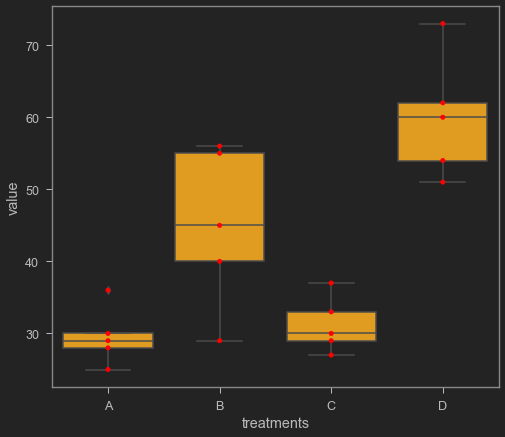

In [7]:
#Let's generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='Orange')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='Red')
plt.show();

In [13]:
# load packages
import scipy.stats as stats

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])

print("F value:",fvalue,"\n p-value:",pvalue)

F value: 17.492810457516338 
 p-value: 2.639241146210922e-05


In [14]:
#To get ANOVA table as R like output, we have to run OLS from stats pckg
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


> Result: 
The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments

## Tukey's Honestly Significantly differenced Test

From the above ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using **Tukey’s honestly significantly differenced (HSD)** test.

Tukey’s HSD test accounts for multiple comparisons and corrects for family-wise error rate (FWER) (inflated type I error)

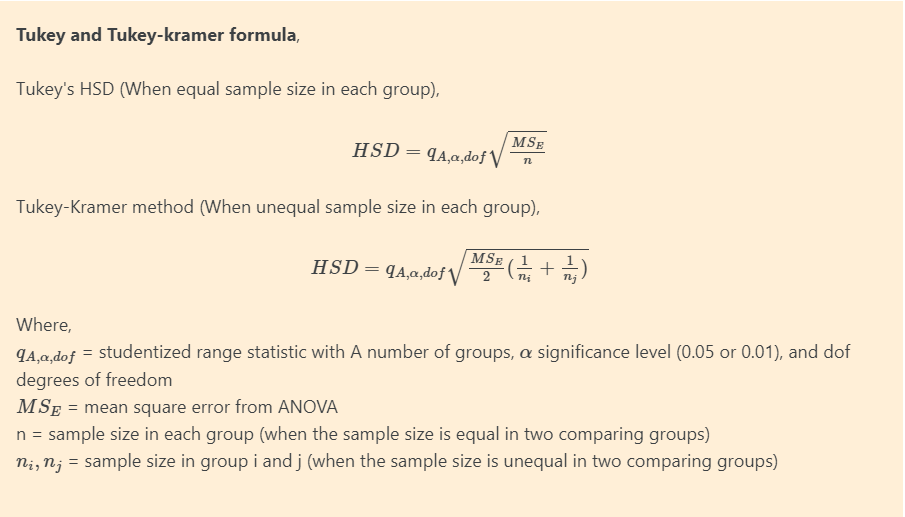

In [15]:
from IPython.display import Image
Image(filename=r'C:\Users\Goutham-ROG\Documents\DS studies\College\2nd Sem - 20.0\MSE - Multivariate Analysis and Econometrics - 3.0\Assignment\deepdive snips\Tukey.png')

In [17]:
#Let's use this bioinfokit to analyse tukeys test
from bioinfokit.analys import stat

#unequal sample size data, tukey_hsd uses Tukey-Kramer test
result = stat()
result.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
#summary
result.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,15.4,1.692871,29.107129,4.546156,0.025070
1,A,C,1.6,-12.107129,15.307129,0.472328,0.900000
2,A,D,30.4,16.692871,44.107129,8.974231,0.001000
3,B,C,13.8,0.092871,27.507129,4.073828,0.048178
4,B,D,15.0,1.292871,28.707129,4.428074,0.029578
5,C,D,28.8,15.092871,42.507129,8.501903,0.001000


> Above results from Tukey’s HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis (p < 0.05) and indicates statistical significant differences.

Note: Tukey's HSD test is conservative and increases the critical value to control the experimentwise type I error rate. If you have a large number of comparisons (say > 10 or 20) to make using Tukey's test, there may be chances that you may not get significant results for all or expected pairs. If you are interested in only specific or few comparisons and you won't find significant differences using Tukey's test, you may split the data for specific comparisons or use the t-test

## How to Test the Assumptions of ANOVA

ANOVA Assumptions:
* Residuals (experimental error) are normally distributed (Shapiro-Wilks Test)
* Homogeneity of variances (variances are equal between treatment groups) (Levene’s or Bartlett’s Test)
* Observations are sampled independently from each other

* ANOVA assumptions can be checked using test statistics (e.g. Shapiro-Wilk, Bartlett’s, Levene’s test) and the visual approaches such as residual plots (e.g. QQ-plots) and histograms.
* The visual approaches perform better than statistical tests. For example, the Shapiro-Wilk test has low power for small sample size data and deviates significantly from normality for large sample sizes.

### QQ plot and Histogram

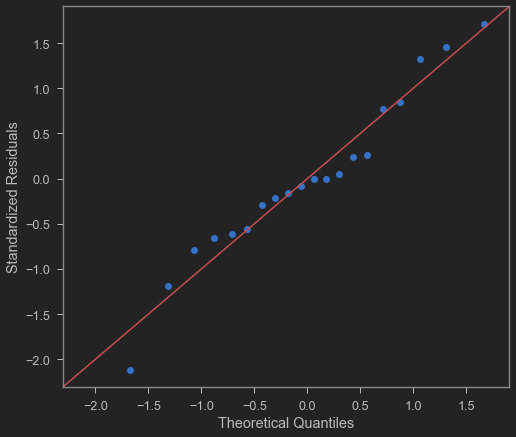

In [19]:
#Let's generate QQ plot
import statsmodels.api as sm

# result.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(result.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show();

>The standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed

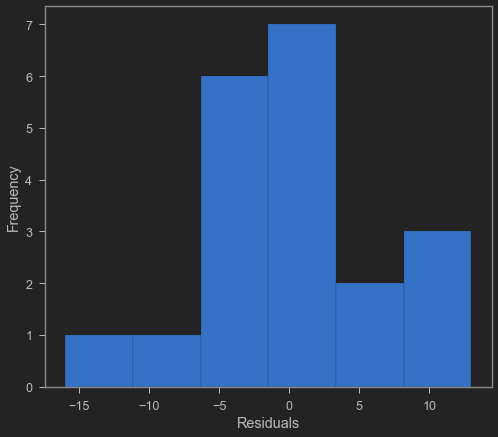

In [20]:
# histogram
plt.hist(result.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

> In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed

### Shapiro-Wilk Test

Shapiro-Wilk test can be used to check the normal distribution of residuals. Null hypothesis: data is drawn from normal distribution.

In [23]:
#Let's load packages
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print("Test statistic::", w,"\np-value:",pvalue)

Test statistic:: 0.9685019850730896 
p-value: 0.7229772806167603


>As the p value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

### Bartlett’s test

Now we know, the data is drawn from normal distribution, use Bartlett’s test to check the **Homogeneity of variances**. Null hypothesis: samples from populations have equal variances.

In [24]:
# load packages
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'])
print("Test statistic:",w,"\np-value:", pvalue)

Test statistic: 5.687843565012841 
p-value: 0.1278253399753447


> As the p value (0.12) is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances

### Levene’s test

Levene’s test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution

In [25]:
#We can get this from bioinfokit lib

result.levene(df=df_melt, res_var='value', xfac_var='treatments')
result.levene_summary

,Parameter,Value
0,Test statistics (W),1.9220
1,Degrees of freedom (Df),3.0000
2,p value,0.1667
